In [43]:
from typing import TypedDict, List
import random
from langgraph.graph import StateGraph, START, END

In [44]:
class AgentState(TypedDict):
  lower_bound: int
  upper_bound: int
  number: int
  hint: str
  guesses: List[int]
  current_guess: int
  attempts: int
  player_name: str
  search_lower_bound: int
  search_upper_bound: int


In [45]:
def setup(state: AgentState) -> AgentState:
  """ Setup variables """

  state['search_lower_bound'] = state['lower_bound']
  state['search_upper_bound'] = state['upper_bound']

  state['guesses'] = []
  state['attempts'] = 0
  state['number'] = random.randint(state['lower_bound'], state['upper_bound'])

  return state

def guess(state: AgentState) -> AgentState:
  """" Agent will guess a random number between search_lower_bound and search_upper_bound """

  # state['current_guess'] = random.randint(state['search_lower_bound'], state['search_upper_bound'])
  state['current_guess'] = int((state['search_lower_bound'] + state['search_upper_bound']) / 2)
  state['guesses'].append(state['current_guess'])

  return state

def hint_node(state:AgentState) -> AgentState:
  """ Hint node will check if guessed number is correct else set if it is lower or higher """

  if(state['current_guess'] == state['number']):
    print(f"Number is guessed!: {state['current_guess']}")
    state['hint'] = 'correct'
    return state

  if(state['current_guess'] < state['number']):
    print(f"Number guessed is lower! current guess: {state['current_guess']}")
    state['hint'] = 'lower'
    state['search_lower_bound'] = state['current_guess'] + 1
  else:
    print(f"Number guessed is higher! current guess: {state['current_guess']}")
    state['hint'] = 'higher'
    state['search_upper_bound'] = state['current_guess'] - 1

  print(f"New search bound: from {state['search_lower_bound']} to {state['search_upper_bound']}")

  state['attempts'] += 1

  return state

def check_guess(state: AgentState) -> str:
  """ Check if guess is correct or guessing will continue """

  if(state['hint'] == 'correct'):
    return "end"

  if(state['attempts'] >= 7):
    print("Number is not guessed in 7 attempts!")
    return "end"

  print(f"Number of Guesses attempted: {state["attempts"]}")

  return "continue"


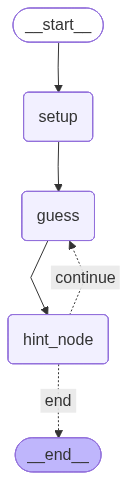

In [46]:
graph = StateGraph(AgentState)

graph.add_node("setup", setup)
graph.add_node("guess", guess)
graph.add_node("hint_node", hint_node)

graph.add_edge(START, "setup")
graph.add_edge("setup", "guess")
graph.add_edge("guess", "hint_node")
graph.add_conditional_edges("hint_node", check_guess, {
  #edge:node
  "continue": "guess",
  "end": END
})

app = graph.compile()
app

In [59]:
result = app.invoke(AgentState(player_name="Mayank", lower_bound=1, upper_bound=200))
result

Number guessed is higher! current guess: 100
New search bound: from 1 to 99
Number of Guesses attempted: 1
Number guessed is higher! current guess: 50
New search bound: from 1 to 49
Number of Guesses attempted: 2
Number guessed is higher! current guess: 25
New search bound: from 1 to 24
Number of Guesses attempted: 3
Number guessed is higher! current guess: 12
New search bound: from 1 to 11
Number of Guesses attempted: 4
Number guessed is lower! current guess: 6
New search bound: from 7 to 11
Number of Guesses attempted: 5
Number guessed is lower! current guess: 9
New search bound: from 10 to 11
Number of Guesses attempted: 6
Number is guessed!: 10


{'lower_bound': 1,
 'upper_bound': 200,
 'number': 10,
 'hint': 'correct',
 'guesses': [100, 50, 25, 12, 6, 9, 10],
 'current_guess': 10,
 'attempts': 6,
 'player_name': 'Mayank',
 'search_lower_bound': 10,
 'search_upper_bound': 11}